In [2]:
import csv
import os
import json
import codecs
import re
import pandas as pd

In [2]:
usernameTweet = []
ID = []
text = []
url = []
nbr_retweet = []
nbr_favorite = []
nbr_reply = []
datetime = []
has_media = []
medias = []
is_reply = []
is_retweet = []
user_id = []

In [3]:
with open('usernameTweet.txt' , 'r' , encoding= 'utf-8') as f:
    usernameTweet.append(f.read())
    

with open('ID.txt' , 'r' , encoding= 'utf-8') as f:
    ID.append(f.read())


with open('text.txt' , 'r' , encoding= 'utf-8') as f:
    text.append(f.read())

    
with open('url.txt' , 'r' , encoding= 'utf-8') as f:
    url.append(f.read())

    
with open('nbr_retweet.txt' , 'r' , encoding= 'utf-8') as f:
    nbr_retweet.append(f.read())


with open('nbr_favorite.txt' , 'r' , encoding= 'utf-8') as f:
    nbr_favorite.append(f.read())

    
with open('nbr_reply.txt' , 'r' , encoding= 'utf-8') as f:
    nbr_reply.append(f.read())

    
with open('datetime.txt' , 'r' , encoding= 'utf-8') as f:
    datetime.append(f.read())

    
with open('has_media.txt' , 'r' , encoding= 'utf-8') as f:
    has_media.append(f.read())

    
with open('medias.txt' , 'r' , encoding= 'utf-8') as f:
    medias.append(f.read())

    
with open('is_retweet.txt' , 'r' , encoding= 'utf-8') as f:
    is_retweet.append(f.read())

    
with open('is_reply.txt' , 'r' , encoding= 'utf-8') as f:
    is_reply.append(f.read())

    
with open('user_id.txt' , 'r' , encoding= 'utf-8') as f:
    user_id.append(f.read())


In [4]:
is_reply[0].split('\n-----------\n')

['false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'true',
 'false',
 'false',
 'false',
 'false',
 'true',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'true',
 'false',
 'false',
 'true',
 'false',
 'false',
 'false',
 'false',
 'false',
 'false',
 'fa

In [5]:
ID = ID[0].split('\n-----------\n')

In [6]:
text = text[0].split('\n-----------\n')

In [7]:
url = url[0].split('\n-----------\n')

In [8]:
nbr_retweet = nbr_retweet[0].split('\n-----------\n')

In [9]:
nbr_favorite = nbr_favorite[0].split('\n-----------\n')

In [10]:
nbr_reply = nbr_reply[0].split('\n-----------\n')

In [11]:
datetime = datetime[0].split('\n-----------\n')

In [12]:
has_media = has_media[0].split('\n-----------\n')

In [13]:
medias = medias[0].split('\n-----------\n')

In [14]:
is_reply = is_reply[0].split('\n-----------\n')

In [15]:
is_retweet = is_retweet[0].split('\n-----------\n')

In [16]:
user_id = user_id[0].split('\n-----------\n')

In [17]:
usernameTweet = usernameTweet[0].split('\n-----------\n')

In [18]:
new_data = []

for i in range (len(text)):
    clean_tweet = re.match('(.*?)http.*?\s?(.*?)', text[i])
    if clean_tweet:
        new_tweet = ''+clean_tweet.group(1) + clean_tweet.group(2)
        
        new_data.append(new_tweet)
    else:
        new_data.append(text[i])

In [19]:
len(new_data)

25462

In [20]:
len(text)

25462

In [21]:
text = new_data

In [22]:
tweet_data = pd.DataFrame(list(zip(usernameTweet, ID, text, url, nbr_retweet, nbr_favorite,nbr_reply, datetime, has_media, medias, is_reply,is_retweet, user_id)), 
               columns =['usernameTweet', 'ID', 'text', 'url', 'nbr_retweet', 'nbr_favorite',
       'nbr_reply', 'datetime', 'has_media', 'medias', 'is_reply',
       'is_retweet', 'user_id'])

In [23]:
model_text = tweet_data['text'].tolist()

In [24]:
import numpy as np
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [25]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [26]:
len(model_text)

25462

In [27]:
model_text = [model_text[i].replace('।','') for i in range(len(model_text))] 
model_text = [model_text[i].replace(',','') for i in range(len(model_text))] 
model_text = [model_text[i].replace(';','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('.','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('<','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('>','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('!','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('@','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('#','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('%','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('*','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('(','') for i in range(len(model_text))] 
model_text = [model_text[i].replace(')','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('+','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('?','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('^','') for i in range(len(model_text))] 
model_text = [model_text[i].replace(':','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('/','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('[','') for i in range(len(model_text))] 
model_text = [model_text[i].replace(']','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('\'','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('\n','') for i in range(len(model_text))] 
model_text = [model_text[i].replace('\t','') for i in range(len(model_text))] 



In [28]:
model_text = [model_text[i].replace('\n','') for i in range(len(model_text))]

In [29]:
model_text = [model_text[i].replace('ও','') for i in range(len(model_text))]

In [30]:
model_text = [model_text[i].replace('এবং','') for i in range(len(model_text))]
model_text = [model_text[i].replace('অথবা','') for i in range(len(model_text))]
model_text = [model_text[i].replace('সুতরাং','') for i in range(len(model_text))]
model_text = [model_text[i].replace('যেহেতু','') for i in range(len(model_text))]
model_text = [model_text[i].replace('অতএব','') for i in range(len(model_text))]
model_text = [model_text[i].replace('সেহেতু','') for i in range(len(model_text))]
model_text = [model_text[i].replace('যদিও','') for i in range(len(model_text))]

In [31]:
model_text = [model_text[i].replace('রে','') for i in range(len(model_text))]
model_text = [model_text[i].replace('রে','') for i in range(len(model_text))]

In [32]:
new_data = []

for i in range (len(text)):
    clean_tweet = re.match('(.*?)http.*?\s?(.*?)', model_text[i])
    if clean_tweet:
        new_tweet = ''+clean_tweet.group(1) + clean_tweet.group(2)
        
        new_data.append(new_tweet)
    else:
        new_data.append(model_text[i])

In [33]:
model_text = new_data

In [34]:
model_text = [model_text[i].replace('তো','') for i in range(len(model_text))]
model_text = [model_text[i].replace('দে','') for i in range(len(model_text))]


In [35]:
model_text[25].replace(model_text[25][0],'')

'engue Fever   ডেঙ্গু জ্বর  কেন হয়  কিভাবে বুঝবেন  ডেঙ্গু জ্বর'

In [36]:
ord(model_text[25][0])

68

In [1]:
for i in range(len(model_text)):
    try:
        for j in range(len(model_text[i])):
            haha = ord(model_text[i][j])
            if haha >= 65 and haha<= 90:
                model_text[i] = model_text[i].replace(model_text[i][j],'')
            elif haha >= 97 and haha<= 122:
                model_text[i] = model_text[i].replace(model_text[i][j],'')
    except:
        continue

NameError: name 'model_text' is not defined

In [38]:
model_text = [model_text[i].replace('\u200c','') for i in range(len(model_text))]

In [39]:
model_text

['নিপা   ডেঙ্গু  প্রতিরোধে সচেতনতা বৃদ্ধিতে স্বনির্ভর গোষ্ঠীর কর্মীরাই লড়বেঃ মন্ত্রী সাধন পান্ডে ',
 '৪ নম্বর বোরো কমিটির উদ্যোগে  ডেঙ্গু   প্লাস্টিক নিয়ে সচেতনামূলক কর্মসূচী  ',
 ' মশা  মশা  তুই অপরাধী   আমার চুষে নেয়া রক্তটুকু  ফিরাইয়া আমার স্কিনের মাঝে কামড় বার অধিকার দিলো কেমশা তুই বড়ই অপরাধী র ক্ষমা নাই র কামড় খেয়ে প্রতি বছর  ডেঙ্গু  বাঁধাইতাম আমি  ',
 ' মশা  মশা তুই অপরাধী  আমার চুষে নেয়া রক্তটুকু  ফিরাইয়া আমার স্কিনের মাঝে কামড় বার অধিকার দিল কেমশা তুই বড়ই অপরাধী র ক্ষমা নাই র কামড় খেয়ে প্রতি বছর  ডেঙ্গু   ',
 ' মশা  মশা  তুই অপরাধী   আমার চুষে নেয়া রক্তটুকু  ফিরাইয়া  আমার স্কিনের মাঝে কামড় বার অধিকার দিলো কে মশা তুই বড়ই অপরাধী র ক্ষমা নাই  র কামড় খেয়ে প্রতি বছর  ডেঙ্গু  বাঁধাইতাম   ',
 ' মশা  মশা  তুই অপরাধী   আমার চুষে নেয়া রক্তটুকু  ফিরাইয়া আমার স্কিনের মাঝে কামড় বার অধিকার দিলো কেমশা তুই বড়ই অপরাধী র ক্ষমা নাই র কামড় খেয়ে প্রতি বছর  ডেঙ্গু  বাঁধাইতাম আমি টিফিনের সব  ',
 'ডেঙ্গু  প্রতিরোধে বিশেষ উদ্যোগ ডায়মন্ড যুবক বৃন্র  ',
 'ডেঙ্গু  রোধে প্রশিক্ষণ

In [100]:
data = model_text

In [101]:
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])


['নিপা ও ডেঙ্গু প্রতিরোধে সচেতনতা বৃদ্ধিতে স্বনির্ভর গোষ্ঠীর কর্মীরাই লড়বেঃ '
 'মন্ত্রী সাধন পান্ডে http://www. biswadarpan.com/News/10214/49/ '
 'activists-of-self-help-groups-will-fight-for-incre … '
 'pic.twitter.com/O1lOsHNrWZ']


['নিপা ও ডেঙ্গু প্রতিরোধে সচেতনতা বৃদ্ধিতে স্বনির্ভর গোষ্ঠীর কর্মীরাই লড়বেঃ মন্ত্রী সাধন পান্ডে http://www. biswadarpan.com/News/10214/49/ activists-of-self-help-groups-will-fight-for-incre … pic.twitter.com/O1lOsHNrWZ',
 '৪ নম্বর বোরো কমিটির উদ্যোগে ডেঙ্গু ও প্লাস্টিক নিয়ে সচেতনামূলক কর্মসূচী ',
 'ও মশা ও মশা রে তুই অপরাধী রে । আমার চুষে নেওয়া রক্তটুকু দে ফিরাইয়া দে। আমার স্কিনের মাঝে কামড় দেবার অধিকার দিলো কে? মশা তুই বড়ই অপরাধী, তোর ক্ষমা নাইরে । তোর কামড় খেয়ে প্রতি বছর ডেঙ্গু বাঁধাইতাম । আমি... https://www. facebook.com/AshikurRahaman 888/posts/644806665855708 …',
 'ও মশা ও মশা রে,,,,,,তুই অপরাধী রে, আমার চুষে নেওয়া রক্তটুকু দে ফিরাইয়া দে,,,,আমার স্কিনের মাঝে কামড় দেবার অধিকার দিল কে??মশা তুই বড়ই অপরাধী তোর ক্ষমা নাই রে....তোর কামড় খেয়ে প্রতি বছর ডেঙ্গু ... ',
 'ও মশা ও মশা রে তুই অপরাধী রে । আমার চুষে নেওয়া রক্তটুকু দে ফিরাইয়া দে। আমার স্কিনের মাঝে কামড় দেবার অধিকার দিলো কে? মশা তুই বড়ই অপরাধী, তোর ক্ষমা নাইরে । তোর কামড় খেয়ে প্রতি বছর ডেঙ্গু বাঁধাইতাম ।... htt

In [42]:
tokenized_data = [model_text[i].split(' ') for i in range(len(model_text))]

In [76]:
tokenized_data[0].remove('')

AttributeError: 'list' object has no attribute 'removeAll'

In [77]:
for i in range(len(tokenized_data)):
    while '' in tokenized_data[i]:
        tokenized_data[i].remove('')

In [81]:
data = tokenized_data

In [83]:
data_words = data

In [84]:
data_words

[['নিপা',
  'ডেঙ্গু',
  'প্রতিরোধে',
  'সচেতনতা',
  'বৃদ্ধিতে',
  'স্বনির্ভর',
  'গোষ্ঠীর',
  'কর্মীরাই',
  'লড়বেঃ',
  'মন্ত্রী',
  'সাধন',
  'পান্ডে'],
 ['৪',
  'নম্বর',
  'বোরো',
  'কমিটির',
  'উদ্যোগে',
  'ডেঙ্গু',
  'প্লাস্টিক',
  'নিয়ে',
  'সচেতনামূলক',
  'কর্মসূচী'],
 ['মশা',
  'মশা',
  'তুই',
  'অপরাধী',
  'আমার',
  'চুষে',
  'নেয়া',
  'রক্তটুকু',
  'ফিরাইয়া',
  'আমার',
  'স্কিনের',
  'মাঝে',
  'কামড়',
  'বার',
  'অধিকার',
  'দিলো',
  'কেমশা',
  'তুই',
  'বড়ই',
  'অপরাধী',
  'র',
  'ক্ষমা',
  'নাই',
  'র',
  'কামড়',
  'খেয়ে',
  'প্রতি',
  'বছর',
  'ডেঙ্গু',
  'বাঁধাইতাম',
  'আমি'],
 ['মশা',
  'মশা',
  'তুই',
  'অপরাধী',
  'আমার',
  'চুষে',
  'নেয়া',
  'রক্তটুকু',
  'ফিরাইয়া',
  'আমার',
  'স্কিনের',
  'মাঝে',
  'কামড়',
  'বার',
  'অধিকার',
  'দিল',
  'কেমশা',
  'তুই',
  'বড়ই',
  'অপরাধী',
  'র',
  'ক্ষমা',
  'নাই',
  'র',
  'কামড়',
  'খেয়ে',
  'প্রতি',
  'বছর',
  'ডেঙ্গু'],
 ['মশা',
  'মশা',
  'তুই',
  'অপরাধী',
  'আমার',
  'চুষে',
  'নেয়া',
  'রক্তটুকু',
  'ফিরাইয

In [82]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])


[['ঙগ', 'পরত', 'সচ', 'তনত', 'বদধ', 'সবন', 'রভর', 'ষঠ', 'করম', 'লডব', 'মনতর', 'ধন', 'নড']]


In [88]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['নিপা', 'ডেঙ্গু', 'প্রতিরোধে', 'সচেতনতা_বৃদ্ধিতে', 'স্বনির্ভর', 'গোষ্ঠীর', 'কর্মীরাই', 'লড়বেঃ', 'মন্ত্রী', 'সাধন', 'পান্ডে']


In [86]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [91]:
# Remove Stop Words
#data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['নিপা', 'ডেঙ্গু', 'প্রতিরোধে', 'বৃদ্ধিতে', 'মন্ত্রী', 'সাধন']]


In [92]:
data_lemmatized[:10]

[['নিপা', 'ডেঙ্গু', 'প্রতিরোধে', 'বৃদ্ধিতে', 'মন্ত্রী', 'সাধন'],
 ['নম্বর', 'ডেঙ্গু', 'কর্মসূচী'],
 ['আমার_চুষে', 'নেয়া_রক্তটুকু', 'স্কিনের_মাঝে', 'নাই', 'র', 'বছর'],
 ['আমার_চুষে', 'নেয়া_রক্তটুকু', 'স্কিনের_মাঝে', 'নাই', 'র', 'বছর', 'ডেঙ্গু'],
 ['আমার_চুষে', 'নেয়া_রক্তটুকু', 'স্কিনের_মাঝে', 'তুই_বড়ই', 'র', 'বছর'],
 ['আমার_চুষে', 'নেয়া_রক্তটুকু', 'স্কিনের_মাঝে', 'নাই', 'র', 'বছর', 'সব'],
 ['ডেঙ্গু', 'বিশেষ', 'যুবক', 'বৃন্র'],
 ['ডেঙ্গু', 'প্রশিক্ষণ', 'গোষ্ঠীর'],
 ['কানে', 'ডেঙ্গু'],
 ['আমার_চুষে', 'নেয়া_রক্তটুকু', 'স্কিনের_মাঝে', 'নাই', 'র', 'বছর', 'ডেঙ্গু']]

In [93]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]


In [94]:
id2word[0]

'ডেঙ্গু'

In [95]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ডেঙ্গু', 1),
  ('নিপা', 1),
  ('প্রতিরোধে', 1),
  ('বৃদ্ধিতে', 1),
  ('মন্ত্রী', 1),
  ('সাধন', 1)]]

In [96]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [97]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.101*"কেউ" + 0.066*"পারলে" + 0.044*"থাকলে" + 0.000*"উৎসব" + 0.000*"এখন" + '
  '0.000*"বলছেন" + 0.000*"যাতে" + 0.000*"হচ্ছে" + 0.000*"সম্বন্ধে" + '
  '0.000*"দুটি"'),
 (1,
  '0.000*"শতভাগ" + 0.000*"কেড়ে_নিল" + 0.000*"iiermFQfg" + 0.000*"চার্টার্ড" + '
  '0.000*"rv" + 0.000*"রাজিন" + 0.000*"ডেংভেক্সিয়া" + 0.000*"পাক" + '
  '0.000*"আয়ক" + 0.000*"ভ্যাকসিনের_অনুমোদন"'),
 (2,
  '0.180*"লক্ষণ" + 0.083*"একজন" + 0.080*"কিছু" + 0.071*"গেছে" + '
  '0.063*"মানুষকে" + 0.060*"দরকার" + 0.045*"জেলা" + 0.041*"r" + 0.032*"এমন" + '
  '0.023*"যখন"'),
 (3,
  '0.145*"ক" + 0.121*"স্বাস্থ্য" + 0.096*"রক্ত" + 0.069*"কোনো" + 0.059*"জন্য" '
  '+ 0.053*"নাই" + 0.039*"বাড়ি" + 0.031*"কারন" + 0.026*"কাজ" + 0.024*"আগে"'),
 (4,
  '0.941*"ডেঙ্গু" + 0.019*"প্রতিরোধে" + 0.005*"মন্ত্রী" + 0.000*"প্রতিরোধ" + '
  '0.000*"ভালো" + 0.000*"এখন" + 0.000*"মাত্র_১\u200bদিনেই" + 0.000*"আপনার_ঘই" '
  '+ 0.000*"যেভাবে" + 0.000*"নতুন"'),
 (5,
  '0.252*"র" + 0.000*"নিয়া" + 0.000*"বাজা" + 0.000*"আসেযেমন" + 0.000*"বহুল" + '

In [38]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.994307914505834

Coherence Score:  0.9999999999999999


In [39]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\onyho\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: Object of type complex is not JSON serializable

PreparedData(topic_coordinates=                                 x   y  topics  cluster       Freq
topic                                                             
37      (0.0033555088145658346+0j)  0j       1        1  97.018059
11     (-6.847977172583374e-05+0j)  0j       2        1   0.060856
21     (-6.847977172583378e-05+0j)  0j       3        1   0.060856
20     (-6.847977172583378e-05+0j)  0j       4        1   0.060856
19     (-6.847977172583378e-05+0j)  0j       5        1   0.060856
18     (-6.847977172583378e-05+0j)  0j       6        1   0.060856
17     (-6.847977172583378e-05+0j)  0j       7        1   0.060856
16     (-6.847977172583378e-05+0j)  0j       8        1   0.060856
15     (-6.847977172583378e-05+0j)  0j       9        1   0.060856
14     (-6.847977172583378e-05+0j)  0j      10        1   0.060856
13     (-6.847977172583378e-05+0j)  0j      11        1   0.060856
12     (-6.847977172583378e-05+0j)  0j      12        1   0.060856
49     (-6.847977172583378e-05+

In [40]:
import os

os.environ['MALLET_HOME'] = 'C:\\mallet'

mallet_path = 'C:\\mallet\\bin\\mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=50, id2word=id2word)

In [41]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

C:\Users\onyho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\wrappers\ldamallet.py:448: RuntimeWarning: invalid value encountered in true_divide
  topic = topic / topic.sum()  # normalize to probability dist


[(0,
  [('fight', 1.0),
   ('বদধ', 0.0),
   ('রভর', 0.0),
   ('করম', 0.0),
   ('তনত', 0.0),
   ('twitt', 0.0),
   ('মনতর', 0.0),
   ('লডব', 0.0),
   ('pic', 0.0),
   ('ষঠ', 0.0)]),
 (11,
  [('twitt', nan),
   ('pic', nan),
   ('ষঠ', nan),
   ('লডব', nan),
   ('রভর', nan),
   ('মনতর', nan),
   ('বদধ', nan),
   ('তনত', nan),
   ('করম', nan),
   ('www', nan)]),
 (10,
  [('twitt', nan),
   ('pic', nan),
   ('ষঠ', nan),
   ('লডব', nan),
   ('রভর', nan),
   ('মনতর', nan),
   ('বদধ', nan),
   ('তনত', nan),
   ('করম', nan),
   ('www', nan)]),
 (6,
  [('http', 0.5),
   ('www', 0.5),
   ('করম', 0.0),
   ('তনত', 0.0),
   ('বদধ', 0.0),
   ('twitt', 0.0),
   ('ষঠ', 0.0),
   ('লডব', 0.0),
   ('pic', 0.0),
   ('রভর', 0.0)]),
 (3,
  [('তনত', 0.5),
   ('করম', 0.5),
   ('twitt', 0.0),
   ('pic', 0.0),
   ('ষঠ', 0.0),
   ('লডব', 0.0),
   ('রভর', 0.0),
   ('মনতর', 0.0),
   ('বদধ', 0.0),
   ('www', 0.0)]),
 (9,
  [('biswadarpan', 1.0),
   ('বদধ', 0.0),
   ('www', 0.0),
   ('করম', 0.0),
   ('তনত', 0.0),
   

C:\Users\onyho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\wrappers\ldamallet.py:379: RuntimeWarning: invalid value encountered in true_divide
  return topics / topics.sum(axis=1)[:, None]



Coherence Score:  0.9999999999999998


In [42]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(17,
  [('twitt', nan),
   ('pic', nan),
   ('ষঠ', nan),
   ('লডব', nan),
   ('রভর', nan),
   ('মনতর', nan),
   ('বদধ', nan),
   ('তনত', nan),
   ('করম', nan),
   ('www', nan)]),
 (11,
  [('twitt', nan),
   ('pic', nan),
   ('ষঠ', nan),
   ('লডব', nan),
   ('রভর', nan),
   ('মনতর', nan),
   ('বদধ', nan),
   ('তনত', nan),
   ('করম', nan),
   ('www', nan)]),
 (1,
  [('incre', 0.3333333333333333),
   ('twitt', 0.3333333333333333),
   ('রভর', 0.3333333333333333),
   ('করম', 0.0),
   ('তনত', 0.0),
   ('মনতর', 0.0),
   ('বদধ', 0.0),
   ('লডব', 0.0),
   ('pic', 0.0),
   ('ষঠ', 0.0)]),
 (16,
  [('সবন', 1.0),
   ('twitt', 0.0),
   ('ষঠ', 0.0),
   ('লডব', 0.0),
   ('রভর', 0.0),
   ('মনতর', 0.0),
   ('বদধ', 0.0),
   ('তনত', 0.0),
   ('করম', 0.0),
   ('www', 0.0)]),
 (14,
  [('pic', 1.0),
   ('twitt', 0.0),
   ('ষঠ', 0.0),
   ('লডব', 0.0),
   ('রভর', 0.0),
   ('মনতর', 0.0),
   ('বদধ', 0.0),
   ('তনত', 0.0),
   ('করম', 0.0),
   ('www', 0.0)]),
 (6,
  [('http', 0.5),
   ('www', 0.5),
   ('করম', 0.0

In [43]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [44]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

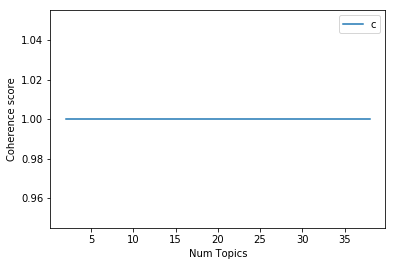

In [45]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [46]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 1.0
Num Topics = 8  has Coherence Value of 1.0
Num Topics = 14  has Coherence Value of 1.0
Num Topics = 20  has Coherence Value of 1.0
Num Topics = 26  has Coherence Value of 1.0
Num Topics = 32  has Coherence Value of 1.0
Num Topics = 38  has Coherence Value of 1.0


In [47]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=40))

[(0,
  '1.000*"করম" + 0.000*"twitt" + 0.000*"pic" + 0.000*"ষঠ" + 0.000*"লডব" + '
  '0.000*"রভর" + 0.000*"মনতর" + 0.000*"বদধ" + 0.000*"তনত" + 0.000*"www"'),
 (1,
  '0.500*"incre" + 0.500*"group" + 0.000*"রভর" + 0.000*"তনত" + 0.000*"বদধ" + '
  '0.000*"www" + 0.000*"মনতর" + 0.000*"লডব" + 0.000*"pic" + 0.000*"ষঠ"'),
 (2,
  '1.000*"news" + 0.000*"বদধ" + 0.000*"মনতর" + 0.000*"করম" + 0.000*"তনত" + '
  '0.000*"twitt" + 0.000*"ষঠ" + 0.000*"লডব" + 0.000*"pic" + 0.000*"রভর"'),
 (3,
  'nan*"twitt" + nan*"pic" + nan*"ষঠ" + nan*"লডব" + nan*"রভর" + nan*"মনতর" + '
  'nan*"বদধ" + nan*"তনত" + nan*"করম" + nan*"www"'),
 (4,
  '1.000*"fight" + 0.000*"বদধ" + 0.000*"রভর" + 0.000*"করম" + 0.000*"তনত" + '
  '0.000*"twitt" + 0.000*"মনতর" + 0.000*"লডব" + 0.000*"pic" + 0.000*"ষঠ"'),
 (5,
  'nan*"twitt" + nan*"pic" + nan*"ষঠ" + nan*"লডব" + nan*"রভর" + nan*"মনতর" + '
  'nan*"বদধ" + nan*"তনত" + nan*"করম" + nan*"www"'),
 (6,
  '0.500*"biswadarpan" + 0.500*"twitt" + 0.000*"তনত" + 0.000*"বদধ" + '
  '0.000*"www" + 0.000*

In [48]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.0652,"twitt, pic, ষঠ, লডব, রভর, মনতর, বদধ, তনত, করম,...",নিপা ও ডেঙ্গু প্রতিরোধে সচেতনতা বৃদ্ধিতে স্বনি...


In [49]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,5.0,0.0652,"twitt, pic, ষঠ, লডব, রভর, মনতর, বদধ, তনত, করম,...",নিপা ও ডেঙ্গু প্রতিরোধে সচেতনতা বৃদ্ধিতে স্বনি...


In [102]:
haha = []
for i in range(len(data_words)):
    if 'মৃত্যু' in data_words[i]:
        
        haha.append(i)

In [103]:
len(haha)

1311